<a href="https://colab.research.google.com/github/itsnikhilshrivastava/Automatic-Text-Generation/blob/master/Multi_Label_Image_Classification_on_Movies_Poster_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [ ]:
data = pd.read_csv("/content/Movies-Poster_Dataset/train.csv")
data.shape

(7254, 27)

In [ ]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
img_width = 200
img_height = 200

x = []

for i in tqdm(range(data.shape[0])):
  path = "/content/Movies-Poster_Dataset/Images/" + data['Id'][i] + ".jpg"
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)
x = np.array(x)

100%|██████████| 7254/7254 [00:36<00:00, 198.18it/s]


In [ ]:
x.shape

(7254, 200, 200, 3)

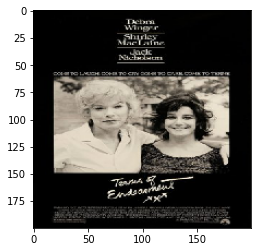

In [ ]:
plt.imshow(x[0])

In [ ]:
data['Genre'][0]

"['Comedy', 'Drama']"

In [ ]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.15)

In [ ]:
x_train.shape

(6165, 200, 200, 3)

Build CNN

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 198, 198, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 97, 97, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)       

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test),batch_size=64)

Epoch 1/5
97/97 [==============================] - 291s 3s/step - loss: 0.8100 - accuracy: 0.0756 - val_loss: 0.5494 - val_accuracy: 0.0156
Epoch 2/5
97/97 [==============================] - 284s 3s/step - loss: 0.4940 - accuracy: 0.1711 - val_loss: 0.3043 - val_accuracy: 0.1901
Epoch 3/5
97/97 [==============================] - 282s 3s/step - loss: 0.3054 - accuracy: 0.2685 - val_loss: 0.2925 - val_accuracy: 0.2792
Epoch 4/5
97/97 [==============================] - 286s 3s/step - loss: 0.2689 - accuracy: 0.2900 - val_loss: 0.2553 - val_accuracy: 0.1892
Epoch 5/5
97/97 [==============================] - 292s 3s/step - loss: 0.2562 - accuracy: 0.3087 - val_loss: 0.2519 - val_accuracy: 0.1901


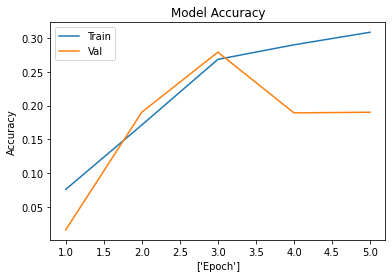

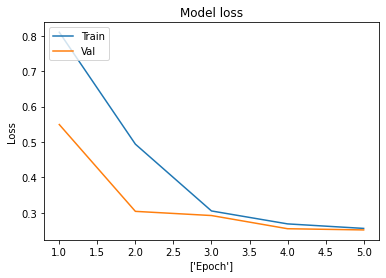

In [ ]:
#plot training & validation accuracy values
epoch_range = range(1,6)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel(['Epoch'])
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#plot training & validation loss values
epoch_range = range(1,6)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel(['Epoch'])
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Testing of model

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Thriller
Action


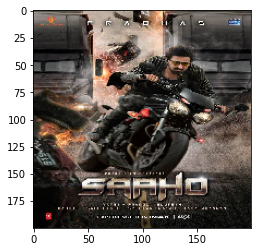

In [ ]:
img = image.load_img('/content/Movies-Poster_Dataset/saaho.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])